# Merging Tables

## 1. Import Data

### Import Libraries/Packages

In [142]:
import pandas as pd
import numpy as np

In [143]:
ridership = pd.read_csv('./clean_data/ridership_by_station_2017.csv')
location = pd.read_csv('./clean_data/station_location.csv')
weather = pd.read_csv('./clean_data/weather_2017.csv')

In [144]:
weather['DATETIME'] = pd.to_datetime(weather['DATETIME'], format='%Y-%m-%d %H:%M:%S')
ridership['DATETIME'] = pd.to_datetime(ridership['DATETIME'], format='%Y-%m-%d %H:%M:%S')

In [145]:
ridership.sample()

,LINENAME,STATION,DATETIME,ENTRIES,EXITS
181915,1,LACKAWANNA,2017-03-21 23:56:28,0.0,0.0


In [146]:
location.sample()

,Unnamed: 0,STATION,Stop Name,GTFS Latitude,GTFS Longitude
20,20,GREENWOOD-111,111 St,40.684331,-73.832163


In [147]:
weather.sample()

,Unnamed: 0,STATION,STATION_NAME,LATITUDE,LONGITUDE,DATETIME,HOURLYPrecip
3531,19691,WBAN:14732,LA GUARDIA AIRPORT NY US,40.7792,-73.88,2017-04-01 04:00:00,0.0


## 2. Add Longitude & Latitude

`['EXITS                                                               ']`

In [148]:
df = pd.merge(ridership, location, how='left', left_on='STATION', right_on='STATION')
df = df.drop('Unnamed: 0', axis=1)

In [149]:
df.loc[df['GTFS Latitude'].isnull()].groupby('STATION').count()

,LINENAME,DATETIME,ENTRIES,EXITS,Stop Name,GTFS Latitude,GTFS Longitude
STATION,,,,,,,
4AV-9 ST,1236,1236,1236,1236,0,0,0
DEKALB AVE,2446,2446,2446,2446,0,0,0
ORCHARD BEACH,338,338,338,338,0,0,0
RIT-MANHATTAN,1187,1187,1187,1187,0,0,0
RIT-ROOSEVELT,1228,1228,1228,1228,0,0,0
ST. GEORGE,1243,1243,1243,1243,0,0,0
TOMPKINSVILLE,1226,1226,1226,1226,0,0,0


In [150]:
location['STATION'].unique()

array(['1 AVE', '1 AV', '103 ST', '103 ST-CORONA', '104 ST', '110 ST',
       '110 ST-CATHEDRL', '110 ST-CPN', 'GREENWOOD-111', '111 ST',
       '116 ST', '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST',
       '137 ST CITY COL', '137 ST-CITY COL', '138 ST-GR CONC',
       '138/GRAND CONC', '138 ST-3 AVE', '14TH STREET', '14 ST-UNION SQ',
       '145 ST', '149 ST-3 AVE', '149 ST-GR CONC', '149/GRAND CONC',
       '15 ST-PROSPECT', '155 ST', '157 ST', '161 ST-YANKEE',
       '161/YANKEE STAD', '163 ST-AMSTERDM', '167 ST', '168 ST',
       '168 ST-BROADWAY', '169 ST', '170 ST', '174 ST', '174-175 ST',
       '174-175 STS', '175 ST', '176 ST', '18 AVE', '18 AV', '18 ST',
       '181 ST', '182-183 ST', '182-183 STS', '183 ST', '190 ST', '191 ST',
       '2 AVE', '2 AV', '20 AVE', '20 AV', '207 ST', '21 ST',
       '21 ST-QNSBRIDGE', '215 ST', '219 ST', '225 ST', '23 ST-5 AVE',
       '23 ST-6 AVE', '23 ST', '231 ST', '233 ST', '238 ST', '25 AVE',
       '25 AV', '25 ST', '28 ST-BROADWAY', 

In [151]:
location.loc[location['STATION'] == 'DEKALB AV']

,Unnamed: 0,STATION,Stop Name,GTFS Latitude,GTFS Longitude
713,713,DEKALB AV,DeKalb Av,40.690635,-73.981824
714,714,DEKALB AV,DeKalb Av,40.703811,-73.918425
715,715,DEKALB AV,DeKalb Av,40.690635,-73.981824
716,716,DEKALB AV,DeKalb Av,40.703811,-73.918425


In [152]:
df.loc[df['STATION'] == '4AV-9 ST', 'GTFS Latitude'] = 40.670272
df.loc[df['STATION'] == '4AV-9 ST', 'GTFS Longitude'] = -73.989779

In [153]:
df.loc[df['STATION'] == 'DEKALB AVE', 'GTFS Latitude'] = 40.690635
df.loc[df['STATION'] == 'DEKALB AVE', 'GTFS Longitude'] = -73.981824

In [154]:
df = df.loc[df['GTFS Latitude'].notnull()]

In [155]:
df['EXITS'] = df['EXITS                                                               ']
df = df.drop('EXITS                                                               ', axis=1)

In [159]:
df['DAYOFYEAR'] = df['DATETIME'].apply(lambda x: x.dayofyear)
df['HOUROFDAY'] = df['DATETIME'].apply(lambda x: x.hour)

In [160]:
df.sample()

,LINENAME,STATION,DATETIME,ENTRIES,Stop Name,GTFS Latitude,GTFS Longitude,EXITS,DAYOFYEAR,HOUROFDAY
1387761,ACE,CANAL ST,2017-04-17 12:00:00,194.736842,Canal St,40.718803,-74.000193,168.052632,107,12


## 3. Add Weather

In [156]:
weather['STATION'].unique()

array(['WBAN:14732', 'WBAN:94728', 'WBAN:94789'], dtype=object)

In [157]:
weather['DAYOFYEAR'] = weather['DATETIME'].apply(lambda x: x.dayofyear)
weather['HOUROFDAY'] = weather['DATETIME'].apply(lambda x: x.hour)

In [158]:
weather.sample()

,Unnamed: 0,STATION,STATION_NAME,LATITUDE,LONGITUDE,DATETIME,HOURLYPrecip,DAYOFYEAR,HOUROFDAY
7742,53054,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,40.6386,-73.7622,2017-01-11 19:51:00,0.0,11,19


In [19]:
gb_day = weather.groupby(['DAYOFYEAR']).mean()
gb_day = gb_day.drop(['Unnamed: 0', 'LATITUDE', 'LONGITUDE', 'DAYOFWEEK'], axis=1)

In [20]:
weather.groupby('STATION_NAME').mean()

,Unnamed: 0,LATITUDE,LONGITUDE,HOURLYPrecip,DAYOFYEAR,DAYOFWEEK
STATION_NAME,,,,,,
JFK INTERNATIONAL AIRPORT NY US,54554.5,40.6386,-73.7622,0.008586,51.806477,2.968404
LA GUARDIA AIRPORT NY US,18174.5,40.7792,-73.8800,0.009400,51.817122,2.962283
NY CITY CENTRAL PARK NY US,35177.5,40.7889,-73.9669,0.010284,50.933011,2.951418


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('ticks')

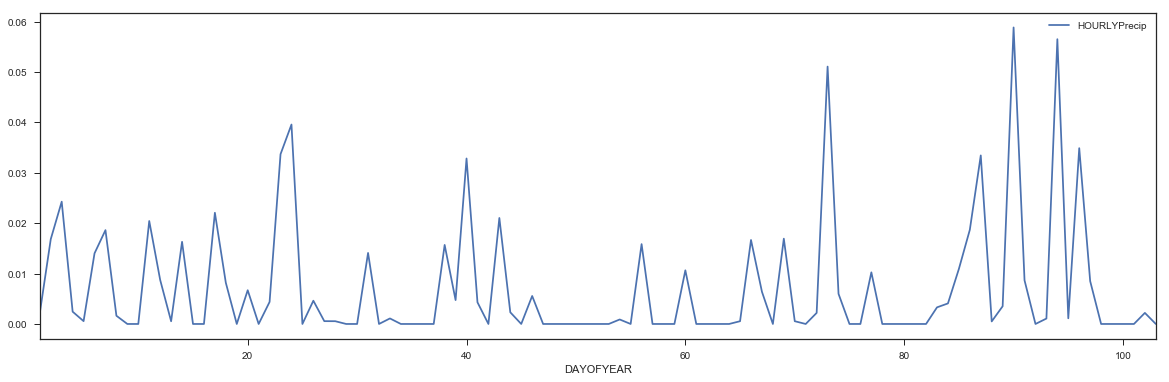

In [22]:
gb_day.plot(figsize=(20,6))

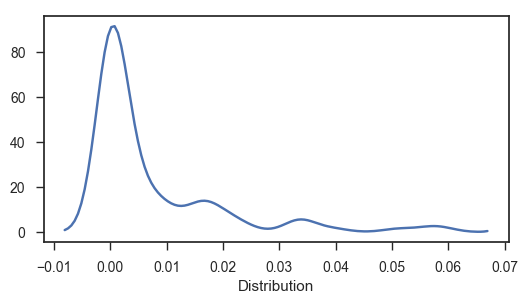

In [24]:
plt.figure(figsize=(6,3), dpi=100)
sns.distplot(gb_day['HOURLYPrecip'].values, hist=False)
plt.xlabel('Distribution')
plt.show()

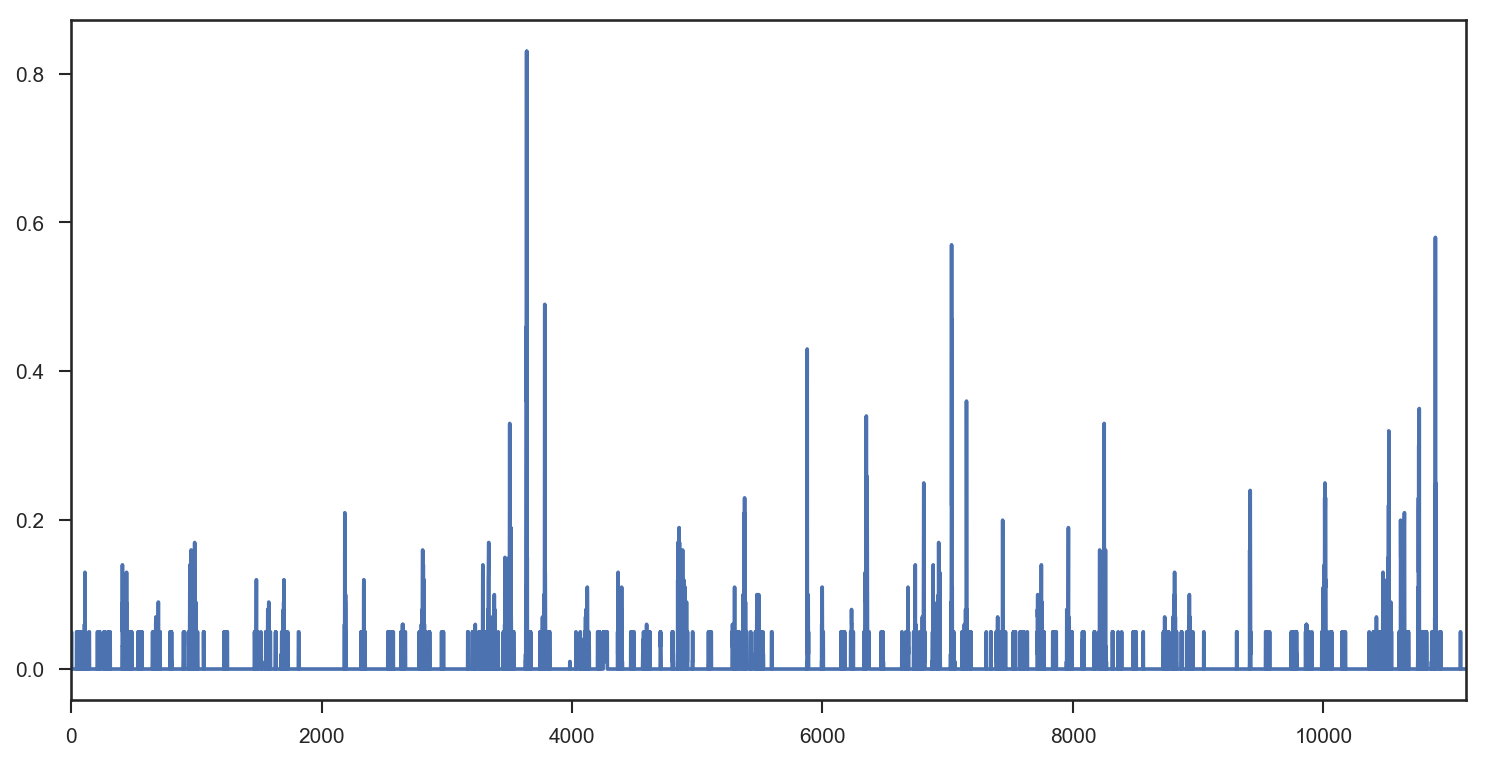

In [35]:
plt.figure(figsize=(12,6),
           dpi=150)

sns.tsplot(weather["HOURLYPrecip"])
plt.show()

### Add Precipitation to Subway Stations

Haversine formula for calculating distance with Longitude and Latitude:

In [49]:
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest(data, v):
    return min(data, key=lambda p: distance(v['lat'],v['lon'],p['lat'],p['lon']))

In [81]:
precip_by_time = weather.groupby(['DATETIME']).mean()
precip_by_time = precip_by_time.drop('Unnamed: 0', axis=1)

In [161]:
merged_df = pd.merge(df, weather, how='left', on=['DAYOFYEAR','HOUROFDAY'], suffixes=('_MTA', '_WEATHER'))

In [162]:
merged_df.loc[test['HOURLYPrecip'].notnull()]

,LINENAME,STATION_MTA,DATETIME_MTA,ENTRIES,Stop Name,GTFS Latitude,GTFS Longitude,EXITS,DAYOFYEAR,HOUROFDAY,Unnamed: 0,STATION_WEATHER,STATION_NAME,LATITUDE,LONGITUDE,DATETIME_WEATHER,HOURLYPrecip
432,1,103 ST,2017-01-01 00:00:00,100.500000,103 St,40.796092,-73.961454,140.166667,1,0,16160.0,WBAN:14732,LA GUARDIA AIRPORT NY US,40.7792,-73.8800,2017-01-01 00:51:00,0.00
433,1,103 ST,2017-01-01 00:00:00,100.500000,103 St,40.796092,-73.961454,140.166667,1,0,33521.0,WBAN:94728,NY CITY CENTRAL PARK NY US,40.7889,-73.9669,2017-01-01 00:51:00,0.00
434,1,103 ST,2017-01-01 00:00:00,100.500000,103 St,40.796092,-73.961454,140.166667,1,0,52656.0,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,40.6386,-73.7622,2017-01-01 00:51:00,0.05
435,1,103 ST,2017-01-01 00:00:00,100.500000,103 St,40.799446,-73.968379,140.166667,1,0,16160.0,WBAN:14732,LA GUARDIA AIRPORT NY US,40.7792,-73.8800,2017-01-01 00:51:00,0.00
436,1,103 ST,2017-01-01 00:00:00,100.500000,103 St,40.799446,-73.968379,140.166667,1,0,33521.0,WBAN:94728,NY CITY CENTRAL PARK NY US,40.7889,-73.9669,2017-01-01 00:51:00,0.00
437,1,103 ST,2017-01-01 00:00:00,100.500000,103 St,40.799446,-73.968379,140.166667,1,0,52656.0,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,40.6386,-73.7622,2017-01-01 00:51:00,0.05
438,1,103 ST,2017-01-01 00:00:00,100.500000,103 St,40.790600,-73.947478,140.166667,1,0,16160.0,WBAN:14732,LA GUARDIA AIRPORT NY US,40.7792,-73.8800,2017-01-01 00:51:00,0.00
439,1,103 ST,2017-01-01 00:00:00,100.500000,103 St,40.790600,-73.947478,140.166667,1,0,33521.0,WBAN:94728,NY CITY CENTRAL PARK NY US,40.7889,-73.9669,2017-01-01 00:51:00,0.00
440,1,103 ST,2017-01-01 00:00:00,100.500000,103 St,40.790600,-73.947478,140.166667,1,0,52656.0,WBAN:94789,JFK INTERNATIONAL AIRPORT NY US,40.6386,-73.7622,2017-01-01 00:51:00,0.05
441,1,103 ST,2017-01-01 00:00:00,100.500000,103 St,40.796092,-73.961454,140.166667,1,0,16160.0,WBAN:14732,LA GUARDIA AIRPORT NY US,40.7792,-73.8800,2017-01-01 00:51:00,0.00


In [163]:
final_df = merged_df.loc[:, ['LINENAME', 'STATION_MTA', 'DATETIME_MTA',
                             'ENTRIES', 'EXITS', 'GTFS Latitude','GTFS Longitude',
                             'STATION_WEATHER','STATION_NAME', 'LATITUDE',
                             'LONGITUDE', 'DATETIME_WEATHER', 'HOURLYPrecip']]

In [166]:
final_df['ENTRIES'] = final_df['ENTRIES'].apply(lambda x: np.int(x))
final_df['EXITS'] = final_df['EXITS'].apply(lambda x: np.int(x))

In [168]:
final_df.to_csv('./clean_data/merged_tables.csv')